In [1186]:
# necessary libraries for python
import cv2
import numpy as np
import matplotlib.image as mg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.utils import get_file
import IPython.display as display
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools
from keras.preprocessing import image
import os
from os import listdir
import keras.utils as image
from PIL import Image as PImage
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import preprocess_input

In [1256]:
c = r"C:\Users\raji9\OneDrive\Desktop\Notebooks\Pythonproject\images.jfif"

In [1260]:
def gbr(img_path,clip_hist_percent=1):
    
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    
    
    
    
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    #configure CLAHE
    clahe = cv2.createCLAHE(clipLimit=0.5,tileGridSize=(8,8))

    #0 to 'L' channel, 1 to 'a' channel, and 2 to 'b' channel
    
#     ret, thresh3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    img[:,:,0] = clahe.apply(img[:,:,0])
    
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    
#     ret, thresh3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

   
    j = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return j

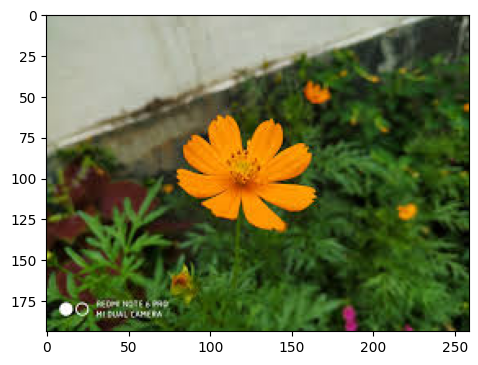

In [1265]:
plt.subplot(221)
plt.imshow(mg.imread(c))

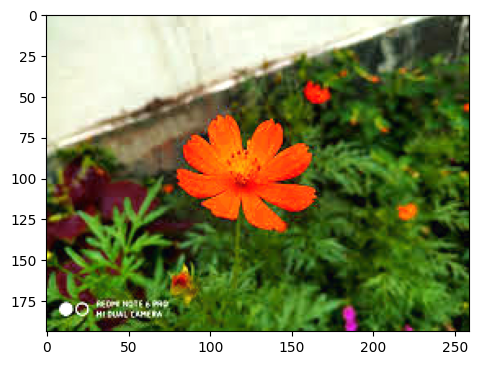

In [1266]:
plt.subplot(221)
g = gbr(c)

In [1267]:
s = r"C:\Users\raji9\OneDrive\Desktop\Notebooks\Pythonproject\download (2).jfif" 
# normal image

In [1268]:
k = r"C:\Users\raji9\OneDrive\Desktop\Notebooks\Style images\1.jpeg"
# styled image

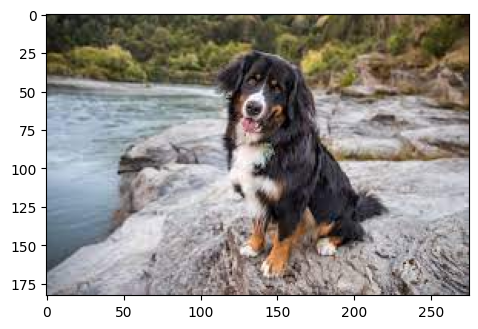

In [1279]:
plt.subplot(221) 
plt.imshow(mg.imread(s))

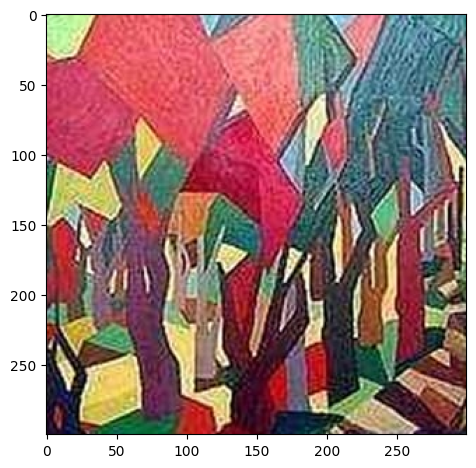

In [1278]:
plt.subplot(221) 
plt.imshow(mg.imread(k))

In [1269]:
def imsho(image, title=None):
    if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
      plt.title(title)

In [1270]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
      assert tensor.shape[0] == 1
    tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [1271]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [1272]:
def styled_image(base, style):
    base_image = load_img(base)
    style_image = load_img(style)
    import tensorflow_hub as hub
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    stylized_image = hub_model(tf.constant(base_image), tf.constant(style_image))[0]
    return tensor_to_image(stylized_image)

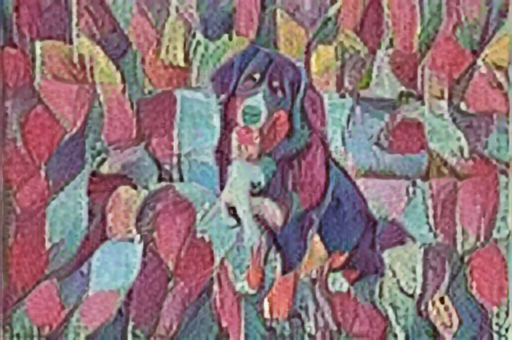

In [1273]:
styled_image(s,k)

In [1292]:
u = r"C:\Users\raji9\OneDrive\Desktop\Notebooks\Pythonproject\download (3).jfif"

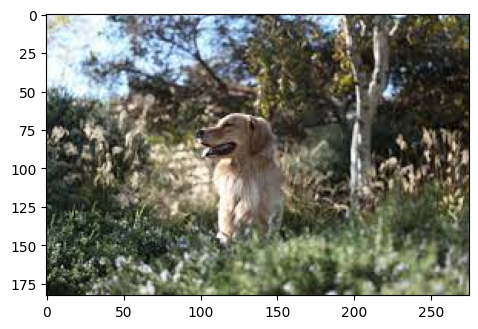

In [1308]:
plt.subplot(221)
plt.imshow(mg.imread(u))

In [1309]:
def denoise(img_path):
    img = plt.imread(img_path)
    dst = cv2.fastNlMeansDenoisingColored(img,None, 10, 10, 7, 21)
    plt.subplot(221)
    x = plt.imshow(dst)
    return x

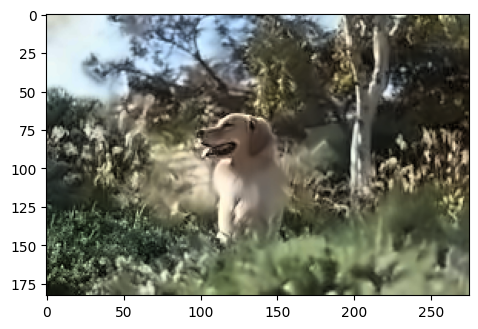

In [1310]:
l = denoise(u)

In [1283]:
p = r"C:\Users\raji9\OneDrive\Desktop\Notebooks\Pythonproject\download (6).jfif"

In [1284]:
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

img_width, img_height = 224, 224
  
model_pretrained = VGG19(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

In [1289]:
def detect(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    
    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    
    
    label = decode_predictions(cnn_feature)
    label = label[0][0]

    plt.subplot(221)
    plt.imshow(img)

    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=10)
    plt.show()
    plt.subplot(221)
    plt.axis("off")

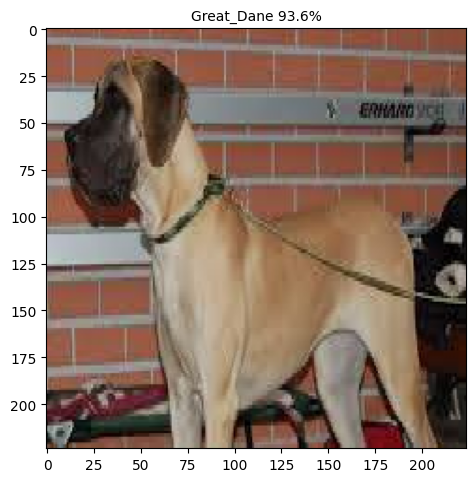

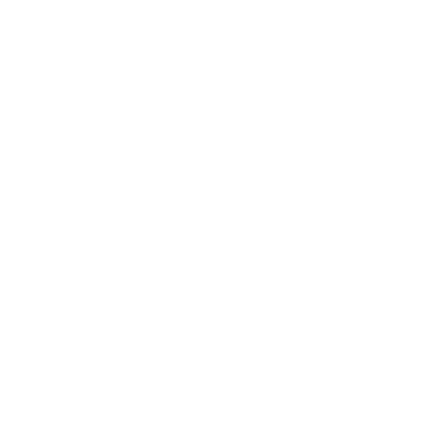

In [1290]:
detect(p)